In [1]:
import numpy as np
import pandas as pd
import matplotlib as pt

In [2]:
df = pd.read_csv("###Alibaba_USD.csv", parse_dates=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1965 non-null   object 
 1   Open       1965 non-null   float64
 2   High       1965 non-null   float64
 3   Low        1965 non-null   float64
 4   Close      1965 non-null   float64
 5   Adj Close  1965 non-null   float64
 6   Volume     1965 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 107.6+ KB


In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,19/9/2014,92.699997,99.699997,89.949997,93.889999,93.889999,271879400
1,22/9/2014,92.699997,92.949997,89.500000,89.889999,89.889999,66657800
2,23/9/2014,88.940002,90.480003,86.620003,87.169998,87.169998,39009800
3,24/9/2014,88.470001,90.570000,87.220001,90.570000,90.570000,32088000
4,25/9/2014,91.089996,91.500000,88.500000,88.919998,88.919998,28598000


In [5]:
df[["day", "month", "year"]] = df["Date"].str.split("/", expand = True)

In [6]:
cols = df.select_dtypes(exclude=['float']).columns
df[cols] = df[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       0 non-null      float32
 1   Open       1965 non-null   float64
 2   High       1965 non-null   float64
 3   Low        1965 non-null   float64
 4   Close      1965 non-null   float64
 5   Adj Close  1965 non-null   float64
 6   Volume     1965 non-null   float64
 7   day        1965 non-null   float32
 8   month      1965 non-null   float32
 9   year       1965 non-null   float32
dtypes: float32(4), float64(6)
memory usage: 122.9 KB


In [8]:
dfAlibaba = df[(df['year']>=2017)&(df['year']<=2021)]
dfAlibaba = dfAlibaba.drop('Date', axis=1)

dfAlibaba = dfAlibaba[['Adj Close', 'day', 'month', 'year']]

dfAlibaba.head()

,Adj Close,day,month,year
576,88.599998,3.0,1.0,2017.0
577,90.510002,4.0,1.0,2017.0
578,94.370003,5.0,1.0,2017.0
579,93.889999,6.0,1.0,2017.0
580,94.720001,9.0,1.0,2017.0


In [9]:
dfAmazon = pd.read_csv('###Amazon_USD.csv',parse_dates=True)
dfEbay = pd.read_csv('###Ebay_USD.csv',parse_dates=True)
dfRak= pd.read_csv('###Rakuten_USD.csv',parse_dates=True)
dfSun= pd.read_csv('###Suning_CNY.csv',parse_dates=True)
dfWay= pd.read_csv('###Wayfair_USD.csv',parse_dates=True)
dfZal= pd.read_csv('###Zalando_EUR.csv',parse_dates=True)
dfJD= pd.read_csv('###Jingdong_USD.csv',parse_dates=True)

ls_df = [dfAlibaba, dfAmazon, dfEbay, dfRak, dfSun, dfWay, dfZal, dfJD]
df = dfAlibaba.copy()

for i in range(1,len(ls_df)):
    ls_df[i][["day", "month", "year"]] = ls_df[i]["Date"].str.split("/", expand = True) 
    cols = ls_df[i].select_dtypes(exclude=['float']).columns
    ls_df[i][cols] = ls_df[i][cols].apply(pd.to_numeric, downcast='float', errors='coerce')
    ls_df[i]= ls_df[i][(ls_df[i]['year']>=2017)&(ls_df[i]['year']<=2021)]
    ls_df[i] = ls_df[i].drop('Date',axis=1)
    ls_df[i] = ls_df[i][['Adj Close','day','month','year']]

In [10]:
ls_df[3]

,Adj Close,day,month,year
740,9.825,3.0,1.0,2017.0
741,10.100,4.0,1.0,2017.0
742,10.250,5.0,1.0,2017.0
743,10.520,6.0,1.0,2017.0
744,10.590,9.0,1.0,2017.0
...,...,...,...,...
1994,9.905,27.0,12.0,2021.0
1995,9.980,28.0,12.0,2021.0
1996,10.130,29.0,12.0,2021.0
1997,10.000,30.0,12.0,2021.0


In [11]:
col_names = ['AmazonP','EbayP','RakutenP','SuningP','WayfairP','ZalandoP','JDcomP']

for i in range(1,len(ls_df)):
    ls_df[i].rename(columns={'Adj Close': col_names[i-1]}, inplace=True)
    df = pd.merge(df, ls_df[i],
                    on = ['day', 'month','year'])
df.rename(columns={'Adj Close': "AlibabaP"}, inplace=True)

In [ ]:
dy=df["day"]
mth=df["month"]
yr=df["year"]
del(df['day'],df['month'],df['year'])

        AlibabaP     AmazonP      EbayP  RakutenP    SuningP    WayfairP  \
0      88.599998   37.683498  28.413393     9.825  11.436833   35.180000   
1      90.510002   37.859001  28.337217    10.100  11.446534   36.480000   
2      94.370003   39.022499  28.575266    10.250  11.407731   37.169998   
3      93.889999   39.799500  29.565544    10.520  11.233124   37.360001   
4      94.720001   39.846001  29.279884    10.590  11.213723   38.049999   
...          ...         ...        ...       ...        ...         ...   
1156  118.660004  171.068497  64.331001     9.770   4.110000  204.369995   
1157  116.589996  169.669495  65.094376     9.905   4.140000  198.880005   
1158  114.800003  170.660995  65.510750     9.980   4.130000  192.860001   
1159  112.089996  169.201004  65.887474    10.130   4.080000  191.720001   
1160  122.989998  168.644501  66.204720    10.000   4.110000  192.809998   

       ZalandoP     JDcomP  
0     37.314999  25.184586  
1     35.919998  25.213848  


In [25]:
dfret = df.pct_change().apply(lambda x: np.log(1+x))
dfret = dfret.iloc[1:len(dfret.index),:]

In [26]:
dfret

,AlibabaP,AmazonP,EbayP,RakutenP,SuningP,WayfairP,ZalandoP,JDcomP
1,0.021329,0.004646,-0.002685,0.027605,0.000848,0.036286,-0.038101,0.001161
2,0.041763,0.030270,0.008365,0.014742,-0.003396,0.018738,0.023252,0.017258
3,-0.005099,0.019716,0.034068,0.026001,-0.015424,0.005099,0.015787,-0.001141
4,0.008801,0.001168,-0.009709,0.006632,-0.001729,0.018300,0.001472,-0.000381
5,0.021205,-0.001281,-0.016394,-0.016183,0.017153,0.075646,-0.004421,0.024079
...,...,...,...,...,...,...,...,...
1156,0.007189,0.000184,0.014748,0.002049,-0.028779,0.002842,0.007973,-0.071660
1157,-0.017599,-0.008212,0.011797,0.013723,0.007273,-0.027230,-0.000851,-0.013787
1158,-0.015472,0.005827,0.006376,0.007543,-0.002418,-0.030737,0.004814,-0.027551
1159,-0.023889,-0.008592,0.005734,0.014918,-0.012180,-0.005929,-0.001414,-0.003650


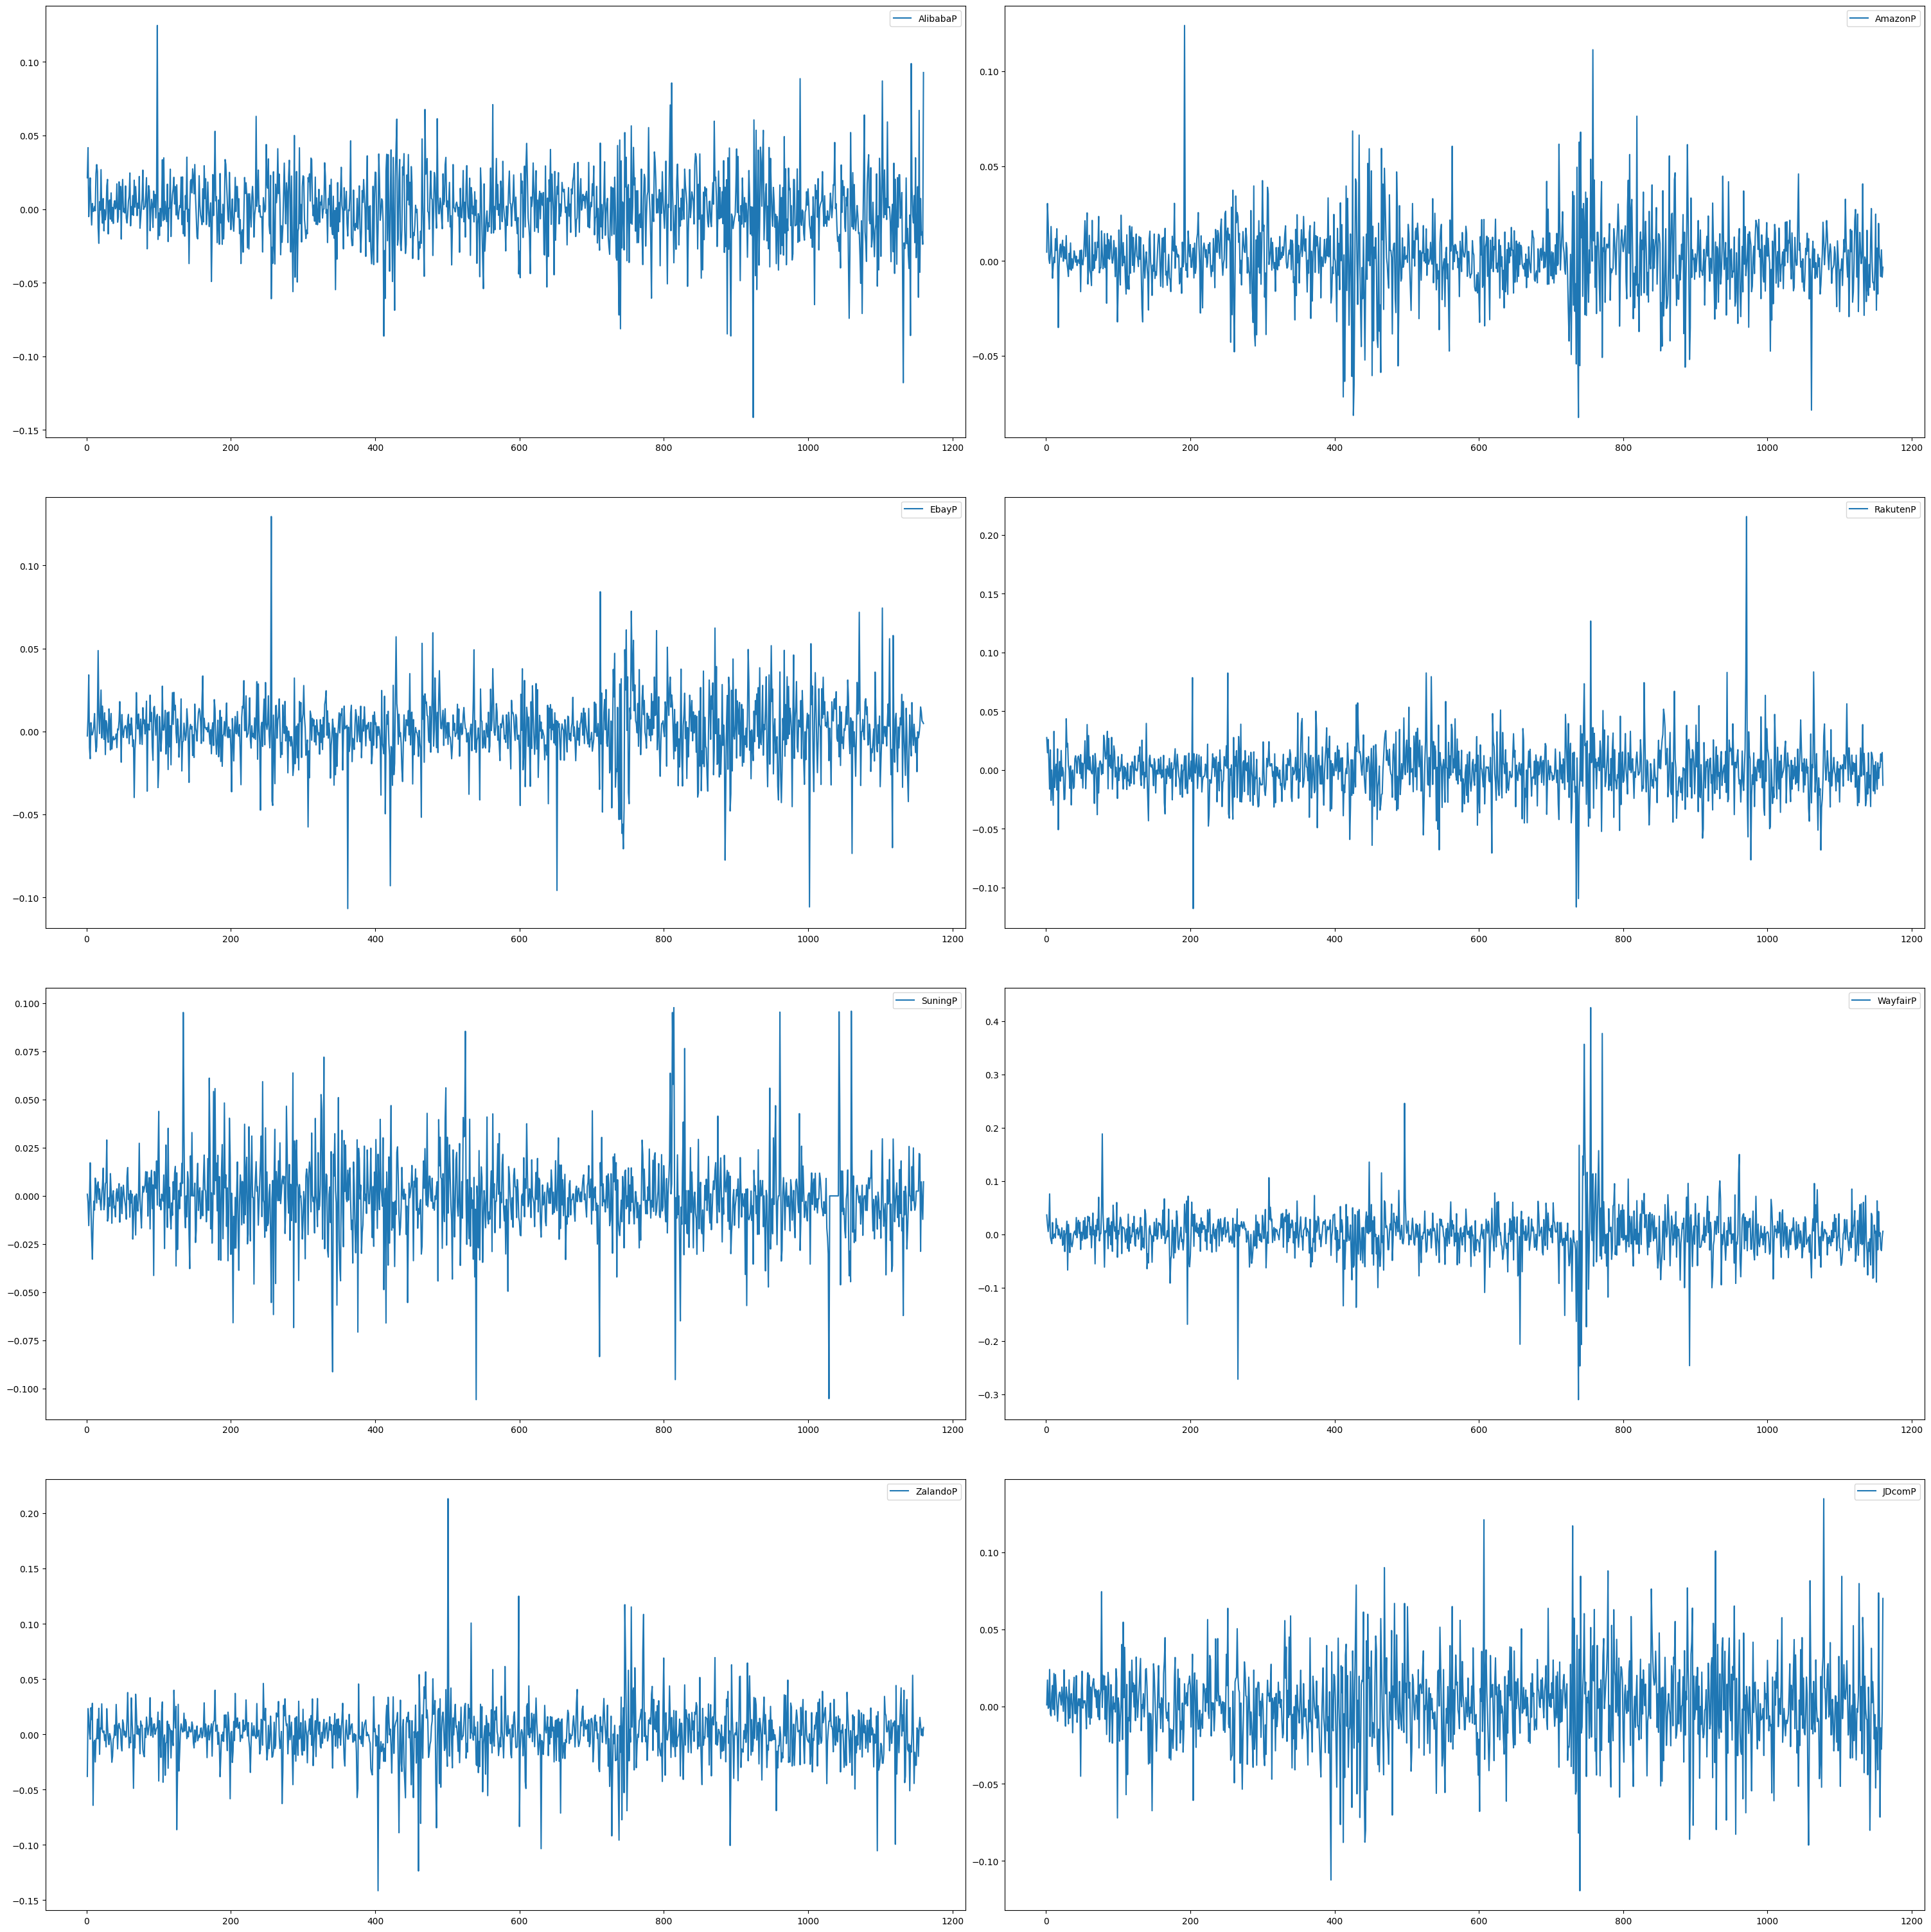

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(30, 30))
index = 0
axs = axs.flatten()
for k in dfret.items():
    sns.lineplot(data = k,ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [28]:
covar = dfret.cov()
covar

,AlibabaP,AmazonP,EbayP,RakutenP,SuningP,WayfairP,ZalandoP,JDcomP
AlibabaP,0.000568,0.000214,0.000141,0.000105,0.000073,0.000308,0.000120,0.000430
AmazonP,0.000214,0.000366,0.000133,0.000080,0.000027,0.000307,0.000115,0.000243
EbayP,0.000141,0.000133,0.000378,0.000080,0.000028,0.000289,0.000113,0.000164
RakutenP,0.000105,0.000080,0.000080,0.000520,0.000043,0.000202,0.000091,0.000116
SuningP,0.000073,0.000027,0.000028,0.000043,0.000423,0.000103,0.000055,0.000064
WayfairP,0.000308,0.000307,0.000289,0.000202,0.000103,0.002131,0.000335,0.000355
ZalandoP,0.000120,0.000115,0.000113,0.000091,0.000055,0.000335,0.000610,0.000169
JDcomP,0.000430,0.000243,0.000164,0.000116,0.000064,0.000355,0.000169,0.000767


In [29]:
corr_matrix = dfret.corr()
corr_matrix

,AlibabaP,AmazonP,EbayP,RakutenP,SuningP,WayfairP,ZalandoP,JDcomP
AlibabaP,1.000000,0.469633,0.304793,0.192598,0.148897,0.280226,0.203696,0.651556
AmazonP,0.469633,1.000000,0.356632,0.183431,0.067568,0.348132,0.242445,0.458592
EbayP,0.304793,0.356632,1.000000,0.181259,0.070084,0.322172,0.236042,0.304356
RakutenP,0.192598,0.183431,0.181259,1.000000,0.091049,0.191544,0.161165,0.184363
SuningP,0.148897,0.067568,0.070084,0.091049,1.000000,0.108223,0.108273,0.113146
WayfairP,0.280226,0.348132,0.322172,0.191544,0.108223,1.000000,0.293582,0.277591
ZalandoP,0.203696,0.242445,0.236042,0.161165,0.108273,0.293582,1.000000,0.247294
JDcomP,0.651556,0.458592,0.304356,0.184363,0.113146,0.277591,0.247294,1.000000


In [30]:
np.isinf(dfret).sum()

AlibabaP    0
AmazonP     0
EbayP       0
RakutenP    0
SuningP     0
WayfairP    0
ZalandoP    0
JDcomP      0
dtype: int64

In [31]:
(np.exp(dfret)).cumprod()

,AlibabaP,AmazonP,EbayP,RakutenP,SuningP,WayfairP,ZalandoP,JDcomP
1,1.021558,1.004657,0.997319,1.027990,1.000848,1.036953,0.962616,1.001162
2,1.065124,1.035533,1.005697,1.043257,0.997455,1.056566,0.985261,1.018590
3,1.059707,1.056152,1.040550,1.070738,0.982188,1.061967,1.000938,1.017428
4,1.069075,1.057386,1.030496,1.077863,0.980492,1.081580,1.002412,1.017041
5,1.091986,1.056032,1.013740,1.060560,0.997455,1.166572,0.997990,1.041828
...,...,...,...,...,...,...,...,...
1156,1.339278,4.539613,2.264108,0.994402,0.359365,5.809266,1.889857,2.658792
1157,1.315914,4.502488,2.290975,1.008142,0.361988,5.653212,1.888249,2.622386
1158,1.295711,4.528799,2.305629,1.015776,0.361114,5.482092,1.897360,2.551123
1159,1.265124,4.490056,2.318888,1.031043,0.356742,5.449687,1.894680,2.541828


<Figure size 640x480 with 0 Axes>

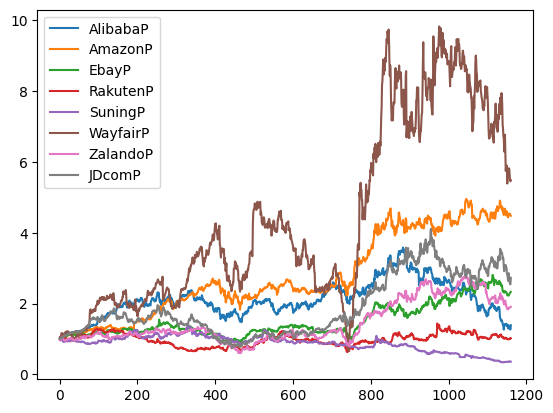

In [33]:
fig = plt.figure()
(np.exp(dfret)).cumprod().plot()
plt.show()

In [34]:
### Ref: https://www.kaggle.com/code/trangthvu/efficient-frontier-optimization/notebook
import scipy
### No shortsale, so all weights must be between 0 and 1. Set 0 and 1 as the boundaries.
from scipy.optimize import Bounds
bounds = Bounds(0, 1)

### The second boundary is the sum of weights.
from scipy.optimize import LinearConstraint
linear_constraint = LinearConstraint(np.ones((dfret.shape[1],), dtype=int),1,1) 
### 1,1 in argument of LinearConstraint refers to Lb, Ub in Lb <= A.dot(w) <= Ub; 
###  if Lb=Ub, it implies equality constraint
### df.shape[0] refers to no. rows, .shape[1] refers to no. cols; 
### np.ones fill up with ones  
### Above -- np.ones((dfret.shape[1],), dtype=int) is A, i.e. 1 x 8 elements of ones 
###  since dfret.shape[1] gives dim of cols
### Then A'w = 1 is the constraint, i.e. sum of wts must equal to one

covar = dfret.cov()
r = np.mean(dfret,axis=0)*252
### axis=0 means to apply calculation “column-wise”, 
###  axis=1 means to:apply calculation “row-wise”, 
### r is annualized vector mean return based on historical data
### Here mean is calculated for each XYZ stock return time series (column)

def ret(r,w):
    return r.dot(w)                              
### Note ret(r,w) is defined here. r.dot(w) is matrix multiplication of r and w
def vol(w,covar):                                
### Risk level or volatility
    return np.sqrt(np.dot(w,np.dot(w,covar))*252)
### same as sqrt of w^T \Sigma w *252 -- annualized return volatility
def sharpe (ret,vol):
    return ret/vol

### Find a portfolio with the minimum risk.
from scipy.optimize import minimize
### Create x0, the first guess at the values of each stock's weight.
weights = np.ones(dfret.shape[1])
x0 = weights/np.sum(weights)

### Define a function to calculate volatility
portfstderr = lambda w: np.sqrt(np.dot(w,np.dot(w,covar))*252)  
### w is input to function lambda that outputs portfvola
res1 = minimize(portfstderr,x0,method='trust-constr',constraints = linear_constraint,bounds = bounds)
### constraint means unit vector .dot(w) = 1; minmize chooses wts w

### Objective function is portfstderr
### 'trust-constr' is to minimize a scalar function subject to constraints 
###   -- algorithm updates x0 till obj fn portfvola is min
### minimize(..) function returns optimal weight w_min
### These are the weights of the stocks in the portfolio with the lowest level of risk possible.
w_min = res1.x   
### optimization full output.x gives the solution array

np.set_printoptions(suppress = True, precision=3)
### Suppress=True means always printing floating point numbers to 3 decimal places

print(w_min)
print('return: % .4f'% (ret(r,w_min)), 'risk: % .4f'% vol(w_min,covar))  
### this is min var portfolio
### “print” treats the % as a special character you need to add, so it can know that when you type “f”
###  the number (result) that will be printed will be a floating point type, and the “.4” tells 
###  your “print” to print only the first 4 digits after the point.

[0.036 0.21  0.209 0.165 0.278 0.    0.102 0.   ]
return:  0.0622 risk:  0.1908


In [35]:
### Define 1/Sharpe_ratio as invSharpe
invSharpe  = lambda w: np.sqrt(np.dot(w,np.dot(w,covar))*252)/r.dot(w)
res2 = minimize(invSharpe,x0,method='trust-constr',constraints = linear_constraint,bounds = bounds)
### Objective function is invSharpe -- inverse of Sharpe ratio
### These are the weights of the stocks in the portfolio with the highest Sharpe ratio 
###  - call the weight vector w_Sharpe

w_Sharpe = res2.x
### constraint means unit vector .dot(w) = 1; minmize chooses wts w
### optimization full output.x gives the solution array of optimal weights in min inverse Sharpe 
###  ratio or max Sharpe ratio

print(w_Sharpe)
print('return: % .4f'% (ret(r,w_Sharpe)), 'risk: % .4f'% vol(w_Sharpe,covar))  
### this is max Sharpe ratio portfolio

print( 1/(  np.sqrt(np.dot(w_Sharpe,np.dot(w_Sharpe,covar))*252)/r.dot(w_Sharpe) ) )
### Above is optimized objective function -- the max Sharpe ratio.
### It can also be found using print(sharpe(ret(r,w_Sharpe),vol(w_Sharpe,covar)))

[0.    0.768 0.171 0.    0.    0.03  0.031 0.   ]
return:  0.2969 risk:  0.2697
1.1006526861512804


******************************************************************


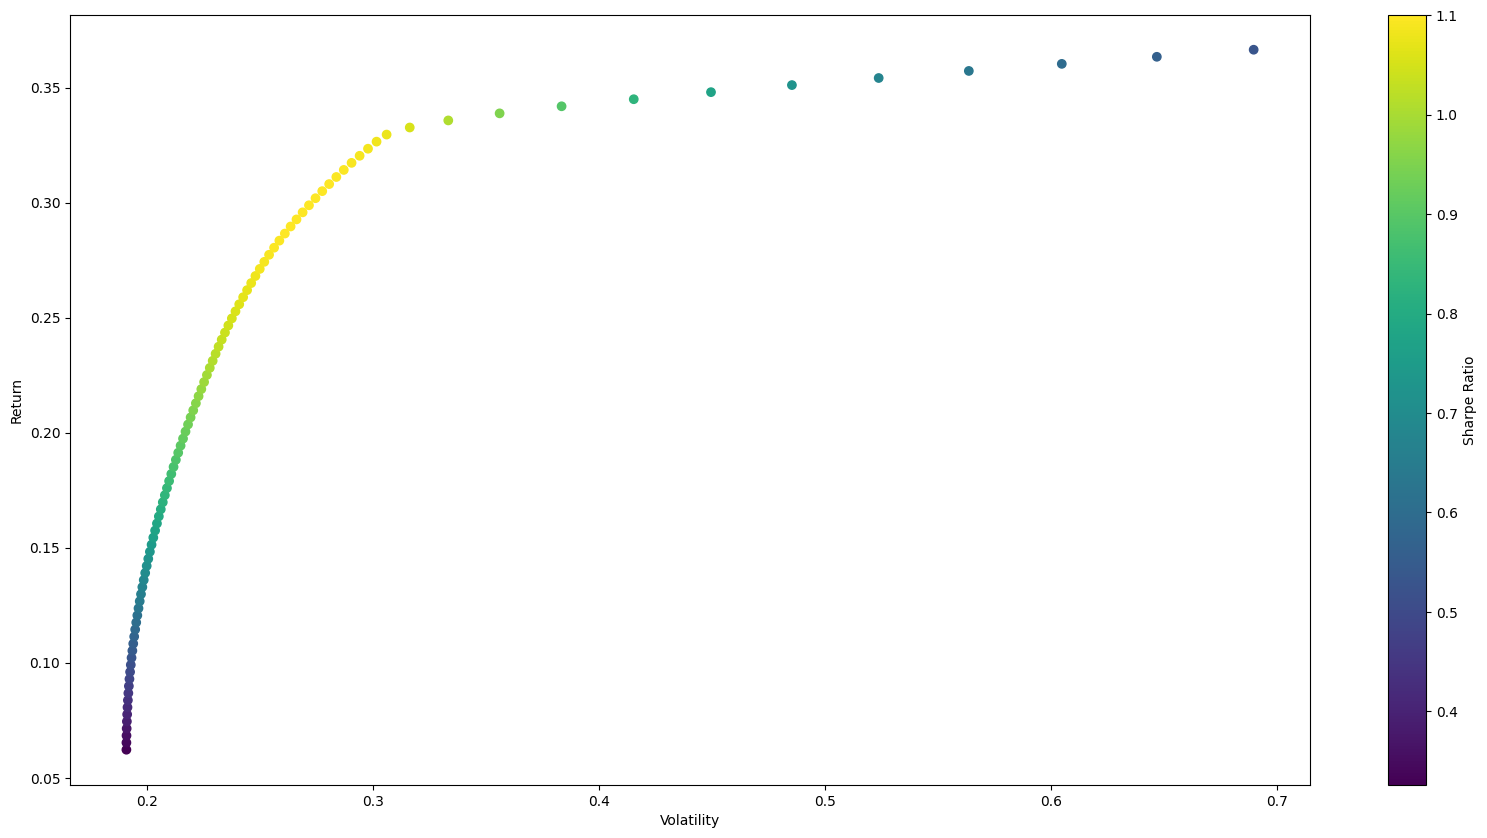

In [36]:
w = w_min ### w is now optimal portfolio weights, sum to 1 
num_ports = 100
gap = (np.amax(r) - ret(r,w_min))/num_ports
### np.amax in numpy returns max in the array -- since weights sum to 1 and are 
###  bounded in (0,1). max portf ret is amax(r)
### The aboove range given by gap starts at ret given by Min Var Portf to Max of all mean returns

all_weights = np.zeros((num_ports, len(dfret.columns))) 
### all_weights is 2D 100 x 8 zero matrix
### Note: len(dfret.columns) is 8 -- there are 8 stocks here
### print(np.shape(all_weights)) gives (100,8) - same as print(all_weights.shape) that gives (100,8)

print("******************************************************************")
##########################################################################################################################
### First note that in Python, a Tuple is a grouping of unnamed, ordered values that can be 
###  of different types; an array is a collection where elements' values can be changed, and 
###  are of a single type. All_weights is a 2D array of 100 rows each with 8 cols. 
###  all_weight[0] below is the first 1D sub-array that is 1st row
### Note: all_weights[0] is [0. 0. 0. 0. 0. 0. 0. 0.], i.e. first row of 100 x 8 all_weight
### Note: all_weights[1] is [0. 0. 0. 0. 0. 0. 0. 0.], i.e. second row of 100 x 8 all_weight
### .........
### Note: all_weights[99 is [0. 0. 0. 0. 0. 0. 0. 0.], i.e. 100th row of 100 x 8 all_weight
### print(all_weights[0].shape) gives (8,) -- a 1-tuple with 8 elements
### print(all_weights.shape[0]) gives 100, i.e. dimension of the rows
### print(all_weights.shape[1]) gives 8, i.e. dim of the cols
##########################################################################################################################

ret_arr = np.zeros(num_ports) ### this is a 1-tuple of 100 zeros
### Note: print(ret_arr.shape) gives (100,) -- this is a 1D tuple
###  print(ret_arr.shape[0]) gives 100, the number of elements in 1D tuple
###  if we print(ret_arr.shape[1]) - this gives "tuple index out of range" as there is no other dim
### If we use instead ret_arr = np.zeros((num_ports,1)), then print(ret_arr.shape) 
###  gives (100,1), a dataframe with one column

vol_arr = np.zeros(num_ports)

for i in range(num_ports): ### this means looping from i=0 to 1,2,3,4,....,99 (100 loops in total)
    port_ret = ret(r,w) + i*gap
    double_constraint = LinearConstraint([np.ones(dfret.shape[1]),r],[1,port_ret],[1,port_ret])
 ### above means left term in first bracket np.ones(dfret.shape[1]) or A * w >< first term 
 ###  in 2nd,3rd brackets 1,1; 
 ### right term in first bracket r * w >< second terms in 2nd, 3rd brackets port_ret 
 ### i.e. constraints port wts sum to 1 and portf exp return == port_ret
    
### Create x0: initial guesses for weights.
    x0 = w_min
### Define a function for annualized portfolio volatility.
    portfvola = lambda w: np.sqrt(np.dot(w,np.dot(w,covar))*252)
    res = minimize(portfvola,x0,method='trust-constr',constraints = double_constraint,bounds = bounds)
### Above double constraints mean unit vector .dot(w) = 1; r .dot(w) = port_ret; minimize chooses wts w
    all_weights[i,:]=res.x ### i row x 8 optimal wts (at row i)
    ret_arr[i]=port_ret
    vol_arr[i]=vol(res.x,covar)
    
### Indented paras after "for i..." form the loop

sharpe_arr = ret_arr/vol_arr  ### sharpe_arr is 100 x 1 array since it is ret_arr[100]/vol_arr[100] element by element

plt.figure(figsize=(20,10))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
### in plt.scatter, c is a scalar or sequence of n numbers to be mapped to colors using cmap 
### in plt, for sequential plots, 'viridis' gives colors across the 3D representation of 
###  vol_arr, ret_arr, sharpe_arr
### c= in front of third dimension sharpe_arr gives the colors in that dimension, otherwise 
###  dots will be all blue
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()

In [37]:
dfret.shape

(1160, 8)

In [38]:
t1=pd.concat([dy,mth,yr],axis=1) ### Axis=1 is important -- aligning columns
t1=t1.iloc[1:,:]
print(t1)

       day  month    year
1      4.0    1.0  2017.0
2      5.0    1.0  2017.0
3      6.0    1.0  2017.0
4      9.0    1.0  2017.0
5     10.0    1.0  2017.0
...    ...    ...     ...
1156  23.0   12.0  2021.0
1157  27.0   12.0  2021.0
1158  28.0   12.0  2021.0
1159  29.0   12.0  2021.0
1160  30.0   12.0  2021.0

[1160 rows x 3 columns]


In [39]:
t1.shape

(1160, 3)